# Facial feature detection  using Dlib

In [ ]:
import cv2
import dlib
from imutils import face_utils
from imutils import paths
import matplotlib.pyplot as plt

## Histogram of Oriented Gradients (HOG) in Dlib
#### It is a popular implement for face detection is offered by Dlib and uses a concept called Histogram of Oriented Gradients (HOG).
##### The idea behind HOG is to extract features into a vector, and feed it into a classification algorithm like a Support Vector Machine for example that will assess whether a face (or any object you train it to recognize actually) is present in a region or not.
##### The features extracted are the distribution (histograms) of directions of gradients (oriented gradients) of the image. Gradients are typically large around edges and corners and allow us to detect those regions.

In [ ]:
# importing the dataset 

from zipfile import ZipFile

filename = 'people.zip'
with ZipFile(filename, 'r') as zip:
  zip.extractall('data')
  print('Done')

In [ ]:
# HOG model 

def detectDlib(imgpath):
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_detect = dlib.get_frontal_face_detector()
    rects = face_detect(gray, 1)
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)
    plt.imshow(frame)
    plt.show()


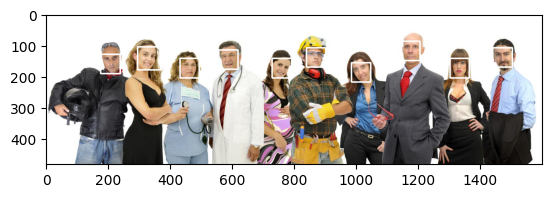

In [ ]:
detectDlib('/content/data/people/people1.jpg')

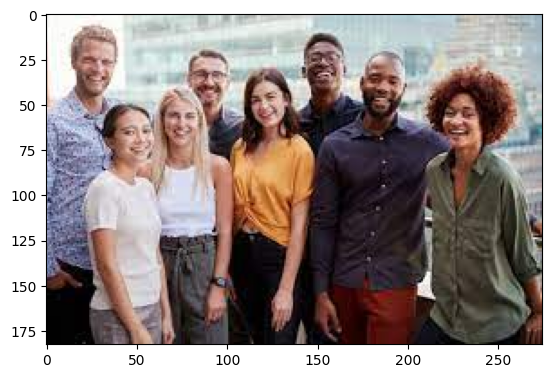

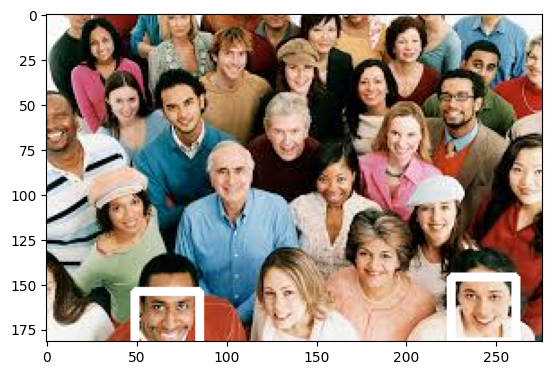

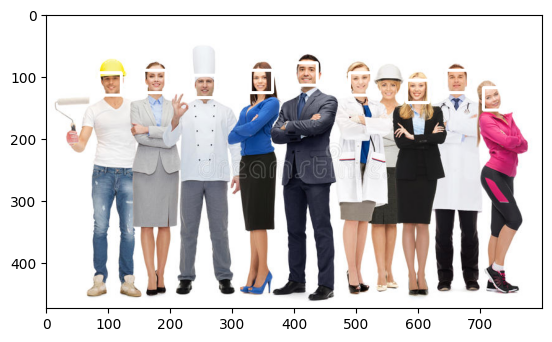

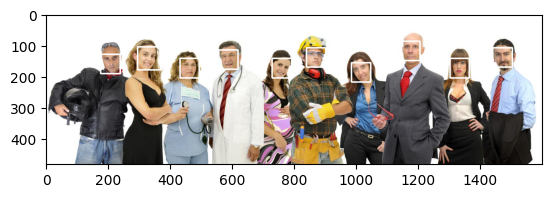

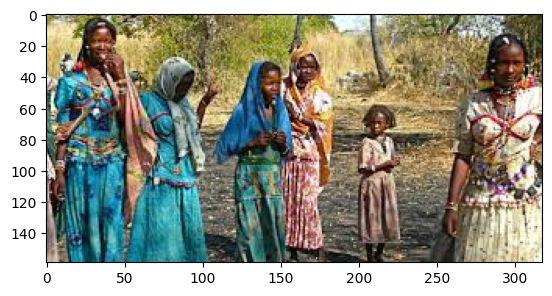

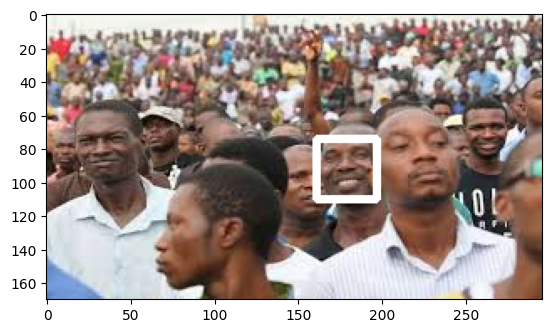

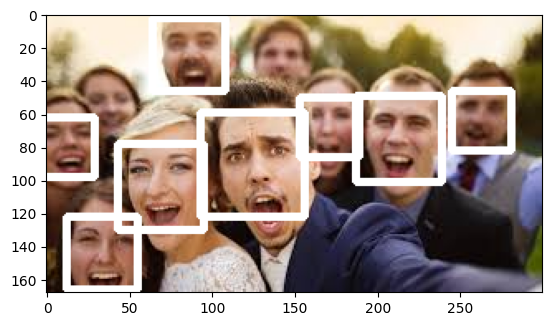

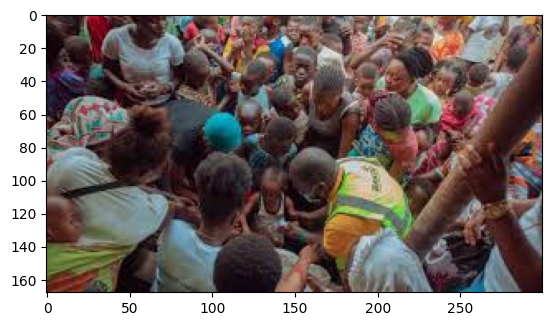

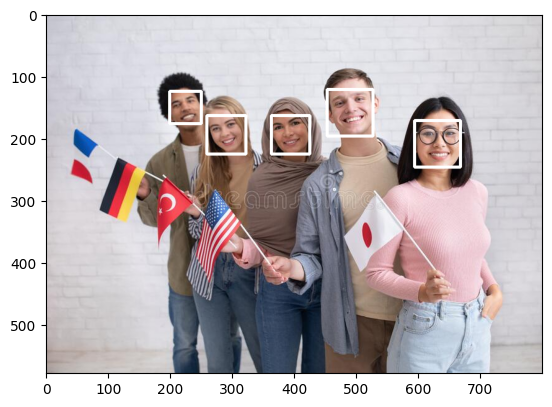

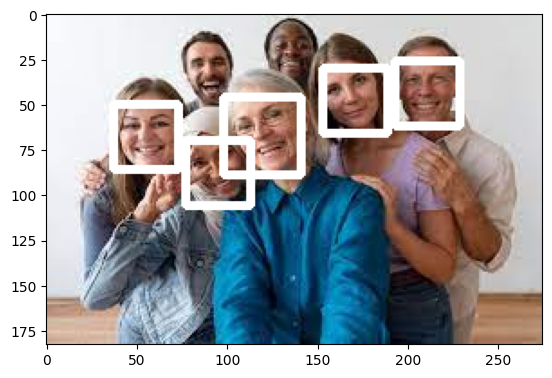

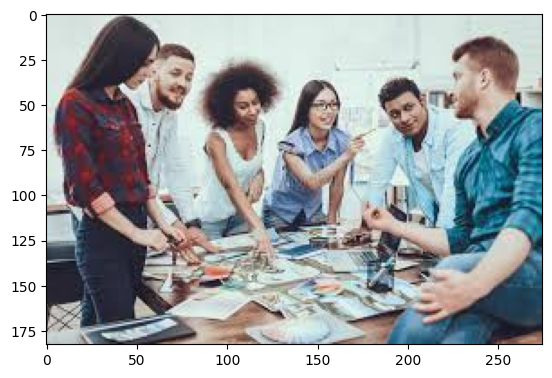

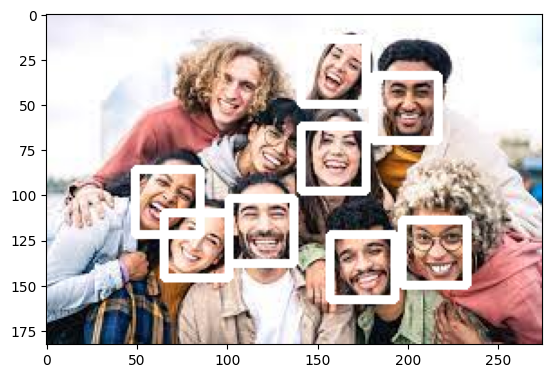

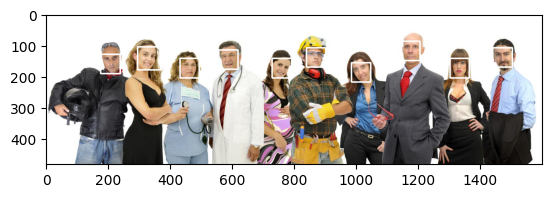

In [ ]:
# looping throught the entire folder to detect the faces in each image
path = list(paths.list_images("/content/data/people"))
for img in path:
  mod=detectDlib(img)

#### Pros
1. Works very well for frontal and slightly non-frontal faces
2. Light-weight model as compared to CNN.
3. Works under small occlusion

#### Cons
1. The major drawback is that it does not detect small faces as it is trained for minimum face size of 80×80. 
2. Does not work very well under substantial occlusion
3. Does not work for side face and extreme non-frontal faces, like looking down or up.


# MMOD Convolutional Neural Network in Dlib
#### It uses a Maximum-Margin Object Detector(MMOD) with CNN based features. The training process for this method is very simple and you don’t need a large amount of data to train a custom object detector.
###### The pre-trained model can be downloaded from the dlib-models repository (https://github.com/davisking/dlib-models).

In [ ]:

def detectDlibDNN(imgpath):
    
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    dnnFaceDetector = dlib.cnn_face_detection_model_v1("/content/mmod_human_face_detector.dat")
    rects = dnnFaceDetector(gray, 1)
    for (i, rect) in enumerate(rects):
        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    plt.imshow(frame)
    plt.show()

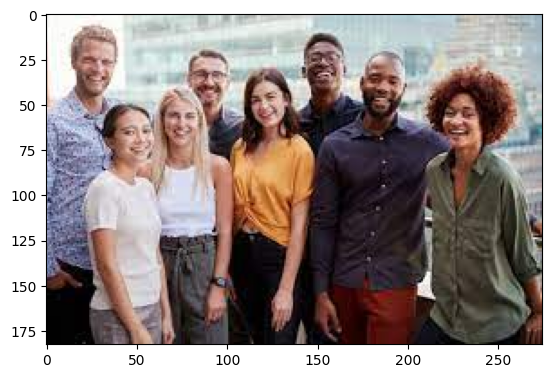

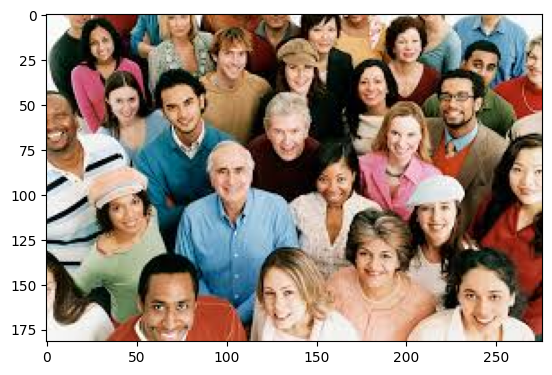

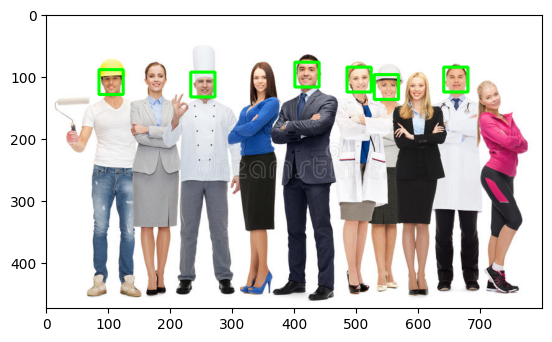

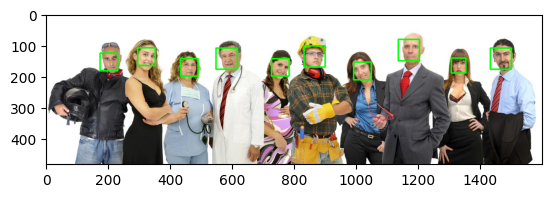

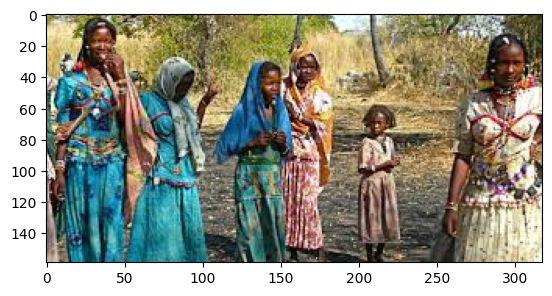

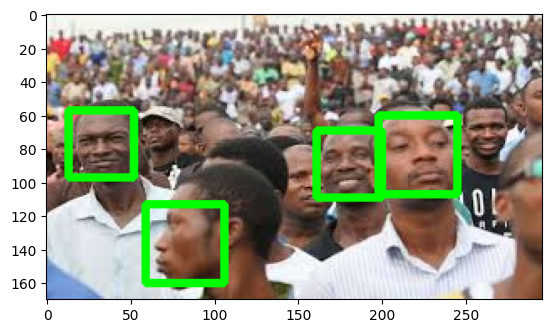

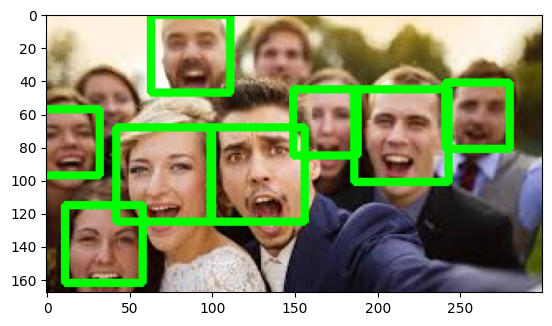

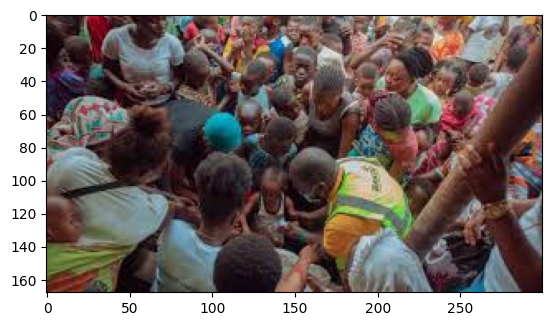

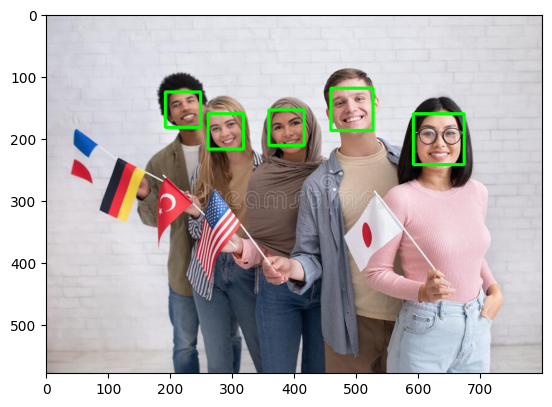

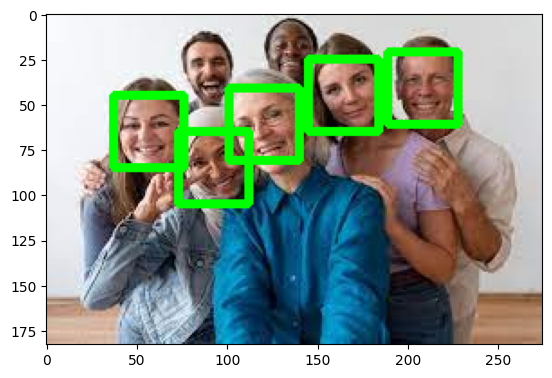

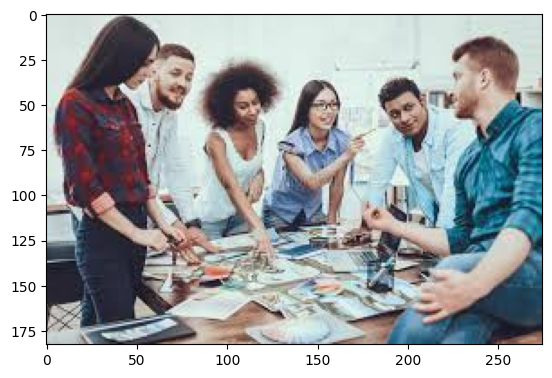

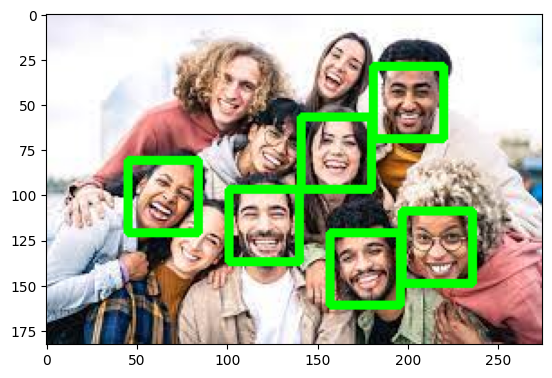

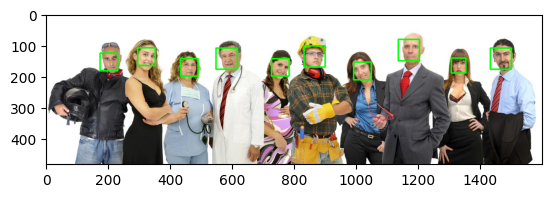

In [ ]:
# looping throught the entire folder to detect the faces in each image
path = list(paths.list_images("/content/data/people"))
for img in path:
  mod=detectDlibDNN(img)


#### Pros
1. Works for different face orientations
2. Robust to occlusion
3. Works very fast on GPU ( when using google colab for the model, you will have to use the GPU)
4. Very easy training process

#### Cons
1. Very slow on CPU
2. Does not detect small faces as it is trained for minimum face size of 80×80. 
3. The bounding box is even smaller than the HoG detector.

### Comparision between Dlib HoG and MMOD:
 
##### Dlib HoG is the fastest method on CPU. But it does not detect small sized faces ( < 70x70 ). 
##### MMOD face detector is the best option as it is very fast on GPU and also provides detection at various angles.
